### well structured - an ode to databases


In [49]:
# access libaries
import yfinance as yf
import sqlite3

# scientific computing pandas (data structures & tools), NumPy (array & tools), SciPy (Integrals, solving differential equations, optimization)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# Visualization matplotlib (plots & graphs, most popular), seaborn (plots: heat maps, time series, violin plots)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
class stock_eval:
    def __init__(self, ticker_symbol):

        # load data
        self.ticker_symbol = ticker_symbol
        self.company_name = yf.Ticker(self.ticker_symbol).info['longName'].replace(r'/', ' ')
        self.currency = yf.Ticker(self.ticker_symbol).info['currency']

        self.to_sql_stock_prices = []

# ------------------------ DATABASE -----------------------------------------

    def to_sqlite_database(self, db_name):

        conn = sqlite3.connect(db_name)
        self.to_sql_stock_prices.to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close() 

    def read_sqlite_database(self, ticker_symbol, db_name, columns):
               
        company_name = yf.Ticker(ticker_symbol).info['longName'].replace(r'/', ' ')
        conn = sqlite3.connect(db_name)
        sql = "SELECT " + columns + " FROM `" + company_name + "`"
        result = pd.read_sql(sql,conn)
        return result

In [6]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
bucket_stock_prices = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    
    # load first item
    stock_mode_obj = stock_eval(ticker_symbol)
    columns = '`close_normal_' + ticker_symbol + '`'
    bucket_stock_prices_load = stock_mode_obj.read_sqlite_database(stock_mode_obj.ticker_symbol, 'stocks_prep.db', columns)

    # concat data
    bucket_stock_prices = pd.concat([bucket_stock_prices, bucket_stock_prices_load], axis=1)

bucket_stock_prices.head(2)

,close_normal_WOOE.AS,close_normal_WY,close_normal_SCA-B.ST,close_normal_SUZ,close_normal_SK3.IR,close_normal_IP,close_normal_STERV.HE,close_normal_RYN,close_normal_WFG,close_normal_WRK,close_normal_PCH
0,0.780673,0.797964,0.644627,0.635598,0.896732,0.901814,0.684542,0.779544,0.695476,0.810607,0.846914
1,0.777786,0.777169,0.627652,0.628880,0.884664,0.895734,0.673074,0.770119,0.694028,0.796625,0.833761


# simple linear regression

In [89]:
# load data
sim_lin_reg_dep_var = pd.DataFrame(bucket_stock_prices['close_normal_WOOE.AS'])
sim_lin_reg_indep_var = pd.DataFrame(bucket_stock_prices['close_normal_WY'])

bucket_sim_lin_reg = pd.concat([sim_lin_reg_dep_var, sim_lin_reg_indep_var], axis=1)

# load model
sim_lin_reg_obj = LinearRegression()

# fit model
sim_lin_reg_obj.fit(sim_lin_reg_dep_var,sim_lin_reg_indep_var)

# predict model
bucket_sim_lin_reg_load = sim_lin_reg_obj.predict(sim_lin_reg_dep_var)

# transform and rename df
bucket_sim_lin_reg_load = map(lambda x: x[0], bucket_sim_lin_reg_load)
bucket_sim_lin_reg_load = pd.Series(bucket_sim_lin_reg_load)
bucket_sim_lin_reg_load = bucket_sim_lin_reg_load.rename('sim_lin_reg_WY')

# concat df
bucket_sim_lin_reg_pred = pd.concat([sim_lin_reg_dep_var, bucket_sim_lin_reg_load], axis=1)

In [90]:
x_train_sim_lin_reg, x_test_sim_lin_reg, y_train_sim_lin_reg, y_test_sim_lin_reg = train_test_split(sim_lin_reg_indep_var, sim_lin_reg_dep_var, test_size=0.10, random_state=1)

# load data
train_sim_lin_reg_dep_var = y_train_sim_lin_reg
train_sim_lin_reg_indep_var = x_train_sim_lin_reg.rename(columns={'close_normal_WY':'train_close_normal_WY'})

train_bucket_sim_lin_reg = pd.concat([train_sim_lin_reg_dep_var, train_sim_lin_reg_indep_var], axis=1)

# load model
train_sim_lin_reg_obj = LinearRegression()

# fit model
train_sim_lin_reg_obj.fit(train_sim_lin_reg_dep_var,train_sim_lin_reg_indep_var)

# predict model
train_bucket_sim_lin_reg_load = train_sim_lin_reg_obj.predict(train_sim_lin_reg_dep_var)

# transform and rename df
train_bucket_sim_lin_reg_load = map(lambda x: x[0], train_bucket_sim_lin_reg_load)
train_bucket_sim_lin_reg_load = pd.Series(train_bucket_sim_lin_reg_load)
train_bucket_sim_lin_reg_load = train_bucket_sim_lin_reg_load.rename('train_sim_lin_reg_WY')



# concat df
train_bucket_sim_lin_reg_pred = pd.concat([train_sim_lin_reg_dep_var, train_bucket_sim_lin_reg_load], axis=1)

print("number of test samples :", x_test_sim_lin_reg.shape[0])
print("number of training samples:",x_train_sim_lin_reg.shape[0])

number of test samples : 63
number of training samples: 561


In [91]:
x_train_sim_lin_reg, x_test_sim_lin_reg, y_train_sim_lin_reg, y_test_sim_lin_reg = train_test_split(sim_lin_reg_indep_var, sim_lin_reg_dep_var, test_size=0.10, random_state=1)

# load data
test_sim_lin_reg_dep_var = y_test_sim_lin_reg
test_sim_lin_reg_indep_var = x_test_sim_lin_reg.rename(columns={'close_normal_WY':'test_close_normal_WY'})

test_bucket_sim_lin_reg = pd.concat([test_sim_lin_reg_dep_var, test_sim_lin_reg_indep_var], axis=1)

# load model
test_sim_lin_reg_obj = LinearRegression()

# fit model
test_sim_lin_reg_obj.fit(test_sim_lin_reg_dep_var,test_sim_lin_reg_indep_var)

# predict model
test_bucket_sim_lin_reg_load = test_sim_lin_reg_obj.predict(test_sim_lin_reg_dep_var)

# transform and rename df
test_bucket_sim_lin_reg_load = map(lambda x: x[0], test_bucket_sim_lin_reg_load)
test_bucket_sim_lin_reg_load = pd.Series(test_bucket_sim_lin_reg_load)
test_bucket_sim_lin_reg_load = test_bucket_sim_lin_reg_load.rename('test_sim_lin_reg_WY')

# concat df
test_bucket_sim_lin_reg_pred = pd.concat([test_sim_lin_reg_dep_var, test_bucket_sim_lin_reg_load], axis=1)

print("number of test samples :", x_test_sim_lin_reg.shape[0])
print("number of training samples:",x_train_sim_lin_reg.shape[0])

number of test samples : 63
number of training samples: 561


#### regression plot

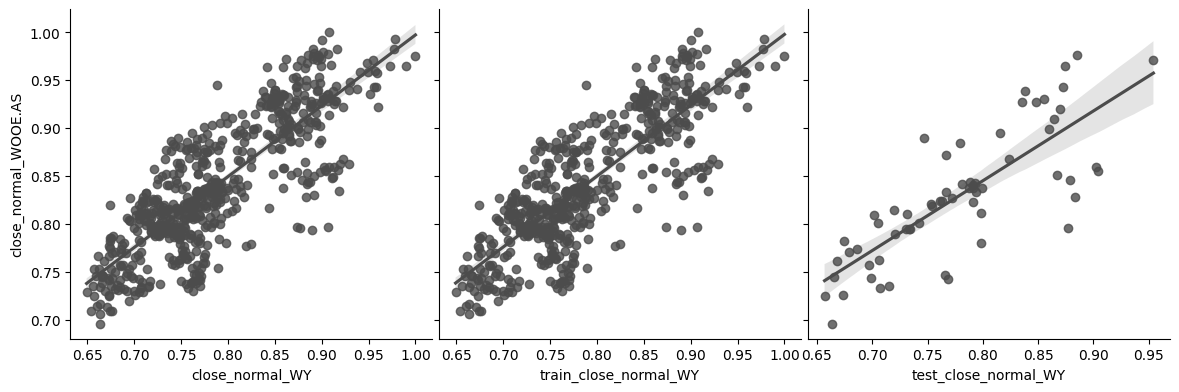

In [92]:
plot_bucket_sim_lin_reg = pd.concat([bucket_sim_lin_reg, train_sim_lin_reg_indep_var, test_sim_lin_reg_indep_var], axis=1)

g = sns.PairGrid(plot_bucket_sim_lin_reg, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", 'train_close_normal_WY','test_close_normal_WY'], height=4)

g.map(sns.regplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)

#### residual plot

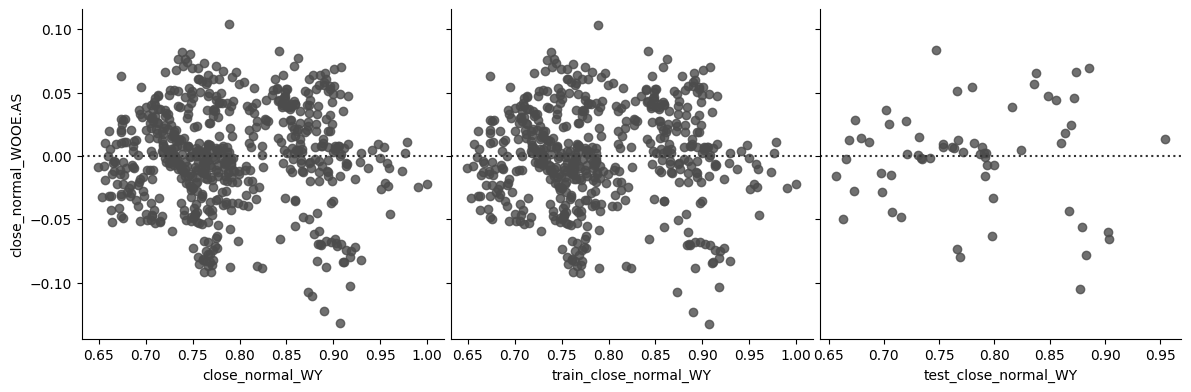

In [93]:
plot_bucket_sim_lin_reg = pd.concat([bucket_sim_lin_reg, train_sim_lin_reg_indep_var, test_sim_lin_reg_indep_var], axis=1)

g = sns.PairGrid(plot_bucket_sim_lin_reg, y_vars=["close_normal_WOOE.AS"], x_vars=["close_normal_WY", 'train_close_normal_WY','test_close_normal_WY'], height=4)

g.map(sns.residplot, color=".3")

g.figure.subplots_adjust(wspace=.02, hspace=.02)

#### distribution plot

<Figure size 600x500 with 0 Axes>

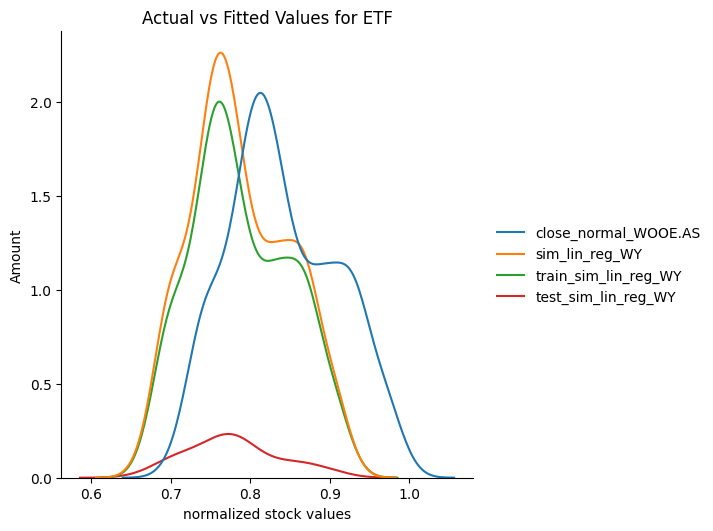

In [94]:
plot_bucket_sim_lin_reg_pred = pd.concat([bucket_sim_lin_reg_pred,train_bucket_sim_lin_reg_load, test_bucket_sim_lin_reg_load], axis=1)
plt.figure(figsize=(6, 5))
sns.displot(plot_bucket_sim_lin_reg_pred, label="Fitted Values" , kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('normalized stock values')
plt.ylabel('Amount')
plt.show()
plt.close()


#### training and testing

In [50]:
x_train_sim_lin_reg, x_test_sim_lin_reg, y_train_sim_lin_reg, y_test_sim_lin_reg = train_test_split(sim_lin_reg_indep_var, sim_lin_reg_dep_var, test_size=0.10, random_state=1)


print("number of test samples :", x_test_sim_lin_reg.shape[0])
print("number of training samples:",x_train_sim_lin_reg.shape[0])

number of test samples : 63
number of training samples: 561


# multiple regresion plot

In [46]:
# load data
mult_lin_reg_dep_var = bucket_stock_prices['close_normal_WOOE.AS']
mult_lin_reg_indep_var = bucket_stock_prices[["close_normal_WY", 'close_normal_IP', 'close_normal_WRK']]

#bucket_mul_lin_reg = pd.concat([mult_lin_reg_dep_var, mult_lin_reg_indep_var], axis=1)

# load model
multi_lin_reg_obj = LinearRegression()

# fit model
multi_lin_reg_obj.fit(mult_lin_reg_indep_var, mult_lin_reg_dep_var)

# predict model
bucket_mul_lin_reg_load=multi_lin_reg_obj.predict(mult_lin_reg_indep_var)

# transform and rename df
#bucket_mul_lin_reg_load = map(lambda x: x[0], bucket_mul_lin_reg_load)
bucket_mul_lin_reg_load = pd.Series(bucket_mul_lin_reg_load)
bucket_mul_lin_reg_load = bucket_mul_lin_reg_load.rename('sim_lin_reg')

# concat df
bucket_sim_lin_reg_pred = pd.concat([sim_lin_reg_dep_var, bucket_mul_lin_reg_load], axis=1)


<Figure size 600x500 with 0 Axes>

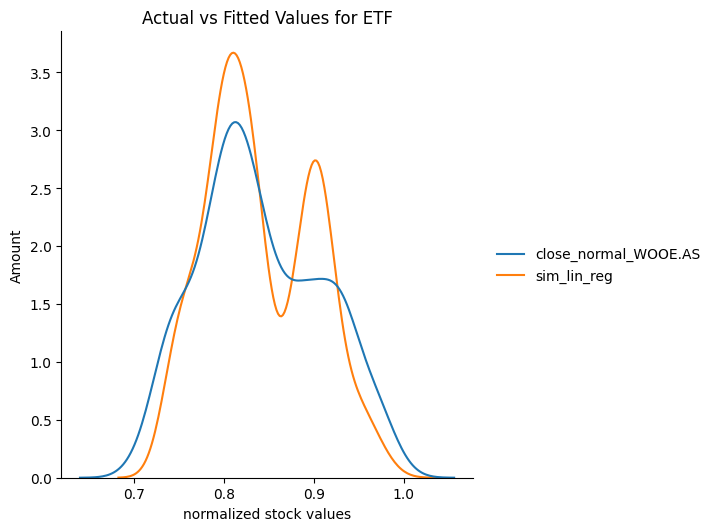

In [47]:
plt.figure(figsize=(6, 5))
sns.displot(bucket_sim_lin_reg_pred, label="Fitted Values" , kind="kde")
plt.title('Actual vs Fitted Values for ETF')
plt.xlabel('normalized stock values')
plt.ylabel('Amount')
plt.show()
plt.close()

# polinominal plot

## immigration

<font color='#5891db'> Using linear regression, it is now possible to predict what the immigration numbers would have been had the referendum and Brexit not taken place. In 2022, around 24,000 people would have immigrated to Germany instead of around 13,000 people.</br> </br>It can be seen that the actual values ​​differ little from the linear regression line.</font>